# Advanced Regression Assignment


# <font color=green> 1. Importing libraies and dataset </font>

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Command to set no. of rows and columns to be displayed
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [3]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train.csv')

# <font color=green> 2. Understanding the Data </font>

### 2.1. Importing the Data Dictionary

In [5]:
with open('data_description.txt') as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Identifying the number of Rows and Columns present in Original Dataset
print('No. of Rows in the dataset =',df.shape[0])
print('No. of Columns in the dataset =',df.shape[1])

No. of Rows in the dataset = 1460
No. of Columns in the dataset = 81


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Observations from the Dataset:
<font color=magenta> 
- The original dataset contains 81 Columns and 1460 Rows
- There are 3 float, 35 integer and 43 object datatypes
</font>

### 2.2. Missing Value Imputation

In [9]:
#Checking for percentage of missing values in the dataframe 'df'
missingdata_percentage = round(((1-(df.count() / len (df)))*100), 2)
missingdata_percentage.sort_values(inplace = True, ascending = False)
print("\nPercentage of missing values in each column:\n")
print(missingdata_percentage)


Percentage of missing values in each column:

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborho

#### Removal of Columns with more missing values

In [10]:
col_to_drop=missingdata_percentage[missingdata_percentage >80].keys()
print("Columns to be dropped :", col_to_drop)
print('\nTotal No.of Columns with missing values greater than 50% =', len(col_to_drop))

Columns to be dropped : Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

Total No.of Columns with missing values greater than 50% = 4


#### Dropping Columns with missing values more than 80%

In [11]:
df2=df.drop(col_to_drop, axis =1)

In [12]:
df2.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive',

In [13]:
df2.shape

(1460, 77)

<font color=magenta> 
- Columns with more than 80 % missing data: 'PoolQC', 'MiscFeature', 'Alley', 'Fence'
- These columns are dropped.
</font>

In [14]:
missingdata_percentage = round(((1-(df2.count() / len (df)))*100), 2)
missingdata_percentage.sort_values(inplace = True, ascending = False)
print("\nPercentage of missing values in columns:\n")
print(missingdata_percentage[missingdata_percentage>0])


Percentage of missing values in columns:

FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64


In [15]:
#Checking the data type of columns with missing value
print("Data type of 'FireplaceQu':", df2['FireplaceQu'].dtypes)
print("Data type of 'LotFrontage':", df2['LotFrontage'].dtypes)
print("Data type of 'GarageYrBlt':", df2['GarageYrBlt'].dtypes)
print("Data type of 'GarageType':", df2['GarageType'].dtypes)
print("Data type of 'GarageFinish':", df2['GarageFinish'].dtypes)
print("Data type of 'GarageQual':", df2['GarageQual'].dtypes)
print("Data type of 'GarageCond':", df2['GarageCond'].dtypes)
print("Data type of 'BsmtExposure':", df2['BsmtExposure'].dtypes)
print("Data type of 'BsmtFinType2':", df2['BsmtFinType2'].dtypes)
print("Data type of 'BsmtFinType1':", df2['BsmtFinType1'].dtypes)
print("Data type of 'BsmtCond':", df2['BsmtCond'].dtypes)
print("Data type of 'BsmtQual':", df2['BsmtQual'].dtypes)
print("Data type of 'MasVnrType':", df2['MasVnrType'].dtypes)
print("Data type of 'MasVnrArea':", df2['MasVnrArea'].dtypes)
print("Data type of 'Electrical':", df2['Electrical'].dtypes)

Data type of 'FireplaceQu': object
Data type of 'LotFrontage': float64
Data type of 'GarageYrBlt': float64
Data type of 'GarageType': object
Data type of 'GarageFinish': object
Data type of 'GarageQual': object
Data type of 'GarageCond': object
Data type of 'BsmtExposure': object
Data type of 'BsmtFinType2': object
Data type of 'BsmtFinType1': object
Data type of 'BsmtCond': object
Data type of 'BsmtQual': object
Data type of 'MasVnrType': object
Data type of 'MasVnrArea': float64
Data type of 'Electrical': object


#### Imputation of Missing values (for columns with percentage of missing values less than 80%)

##### Imputing the missing values of numerical variables with mean

In [16]:
df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df2['MasVnrArea']=df2['MasVnrArea'].fillna(df2['MasVnrArea'].mean())
df2['GarageYrBlt']=df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].mean())

##### Imputing the missing values of categorical variables with mode

In [17]:
df2['MasVnrType']=df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['BsmtQual']=df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['BsmtCond']=df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])
df2['BsmtExposure']=df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])
df2['BsmtFinType1']=df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['BsmtFinType2']=df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0])
df2['Electrical']=df2['Electrical'].fillna(df2['Electrical'].mode()[0])
df2['FireplaceQu']=df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0])
df2['GarageType']=df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2['GarageFinish']=df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['GarageQual']=df2['GarageQual'].fillna(df2['GarageQual'].mode()[0])
df2['GarageCond']=df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])

In [18]:
df2.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [19]:
# Dropping 'Id' column
df2.drop(['Id'],axis=1,inplace=True)

# <font color=green> 3. Exploratory Data Analysis </font>

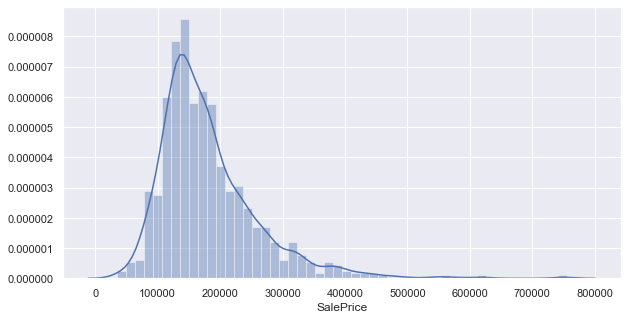

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df2['SalePrice'], bins =50)

<font color=magenta> Target variable 'SalePrice' is skewed in the right side.

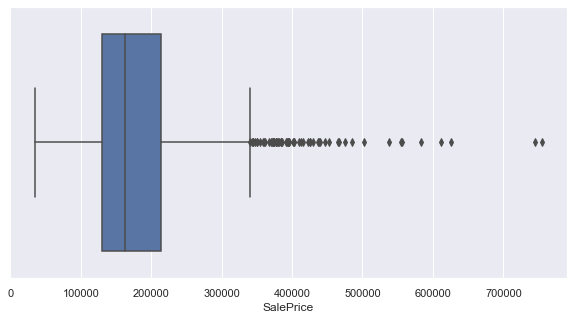

In [21]:
sns.boxplot(df2['SalePrice'])

In [22]:
df2['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
print("Shape of dataframe before Outlier Removal in Target Variable:",df2.shape)

Shape of dataframe before Outlier Removal in Target Variable: (1460, 76)


In [24]:
Q1, Q3 = df2['SalePrice'].quantile(0.25), df2['SalePrice'].quantile(0.75)
IQR = Q3- Q1
cut_off = IQR * 1.5
lower_fence, upper_fence = Q1 - cut_off, Q3 + cut_off
df2.drop(df2[df2['SalePrice']<lower_fence].index, axis =0, inplace =True)
df2.drop(df2[df2['SalePrice']>upper_fence].index, axis =0, inplace =True)

In [25]:
print("Shape of dataframe after Outlier Removal in Target Variable:",df2.shape)

Shape of dataframe after Outlier Removal in Target Variable: (1399, 76)


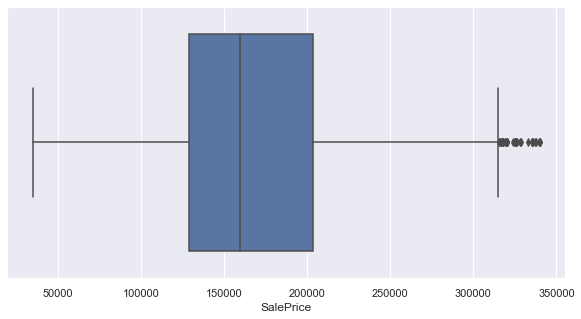

In [26]:
sns.boxplot(df2['SalePrice'])

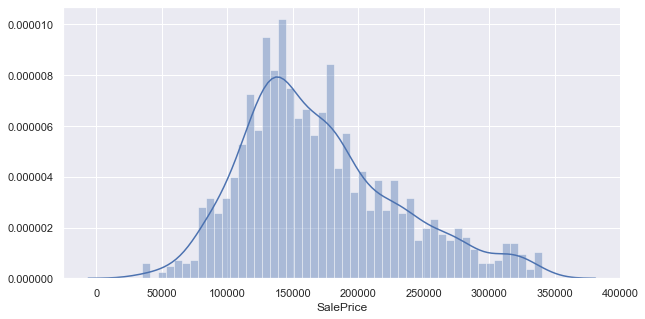

In [27]:
sns.distplot(df2['SalePrice'], bins =50)

<font color=magenta> Outliers are removed with respect to Target variable 'SalePrice'.

In [28]:
#log transforming the  predictor variable
df2['SalePrice'] = np.log1p(df2['SalePrice'])

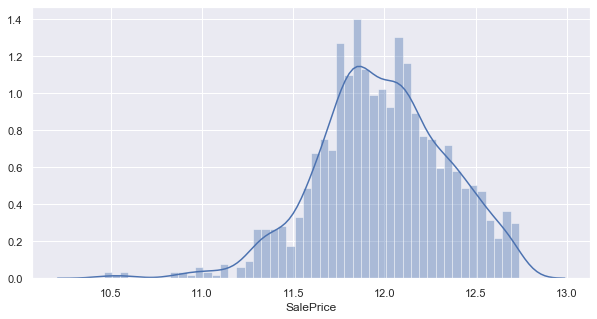

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df2['SalePrice'], bins =50)

Analysing the target variable 'SalePrice' against other variables

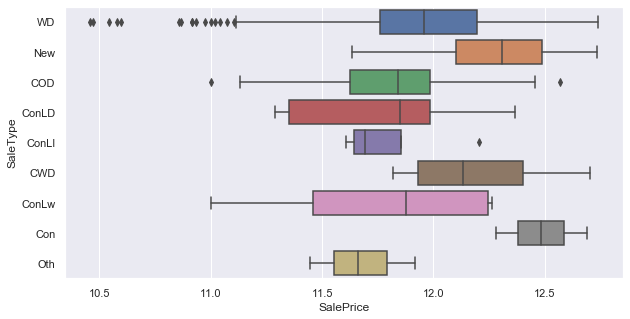

In [30]:
sns.boxplot(data=df2, x='SalePrice', y='SaleType')

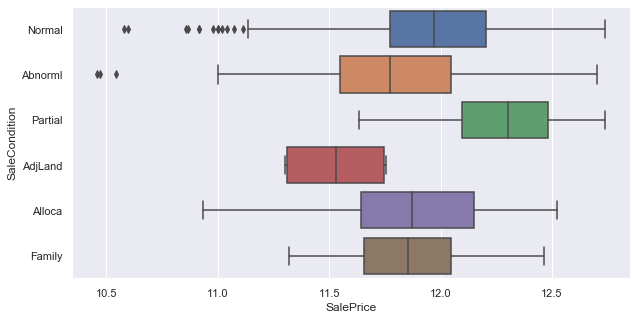

In [31]:
sns.boxplot(data=df2, x='SalePrice', y='SaleCondition')

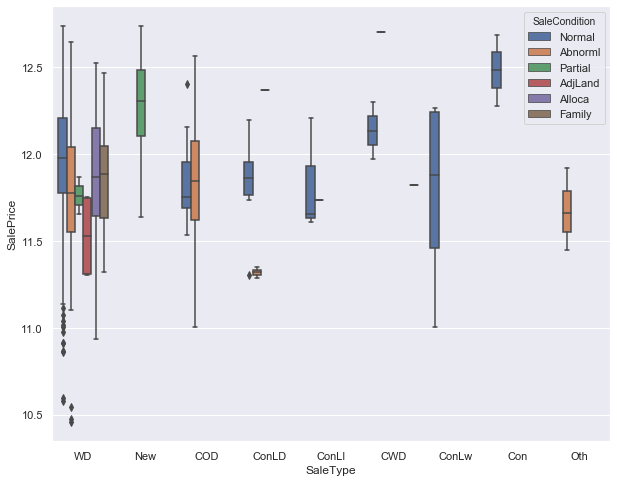

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data = df2, x = 'SaleType', y = 'SalePrice',hue = 'SaleCondition')
plt.xlabel('SaleType')
plt.ylabel('SalePrice')
plt.show()

<font color=magenta>
    From the above boxplots, it is observed that the SalePrice is more for new homes.
</font>

<font color=navy>
    <b> Deriving new metric from variables related to year based on above analysis: </b>
</font>

In [33]:
# Derived Metrics realted to year
df2['Age']= df2['YrSold'] - df2['YearBuilt']
df2['RemodelAge']= df2['YrSold'] - df2['YearRemodAdd']

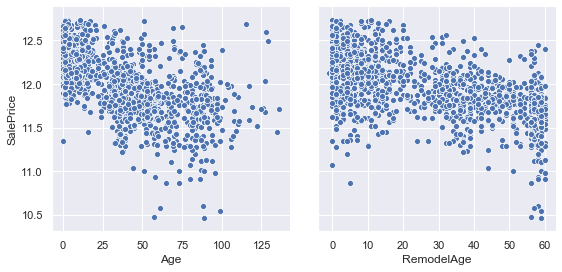

In [34]:
sns.pairplot(df2, x_vars=['Age', 'RemodelAge'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

<font color=magenta>
    With increasing age of the home, the sale price is reduced.
</font>

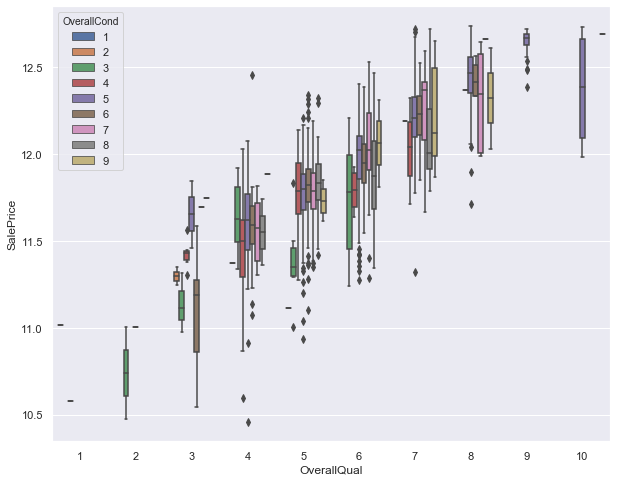

In [35]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data = df2, x = 'OverallQual', y = 'SalePrice',hue = 'OverallCond')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

<font color=magenta>
Higher the rating of Overall Quality, higher the Sales Price.

<b> Plotting 'SalePrice' against variables related to area </b>

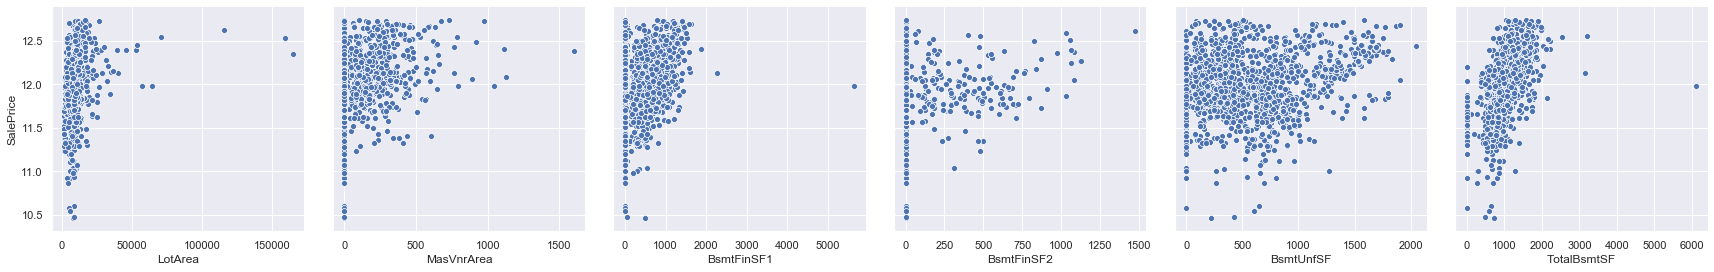

In [36]:
sns.pairplot(df2, x_vars=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

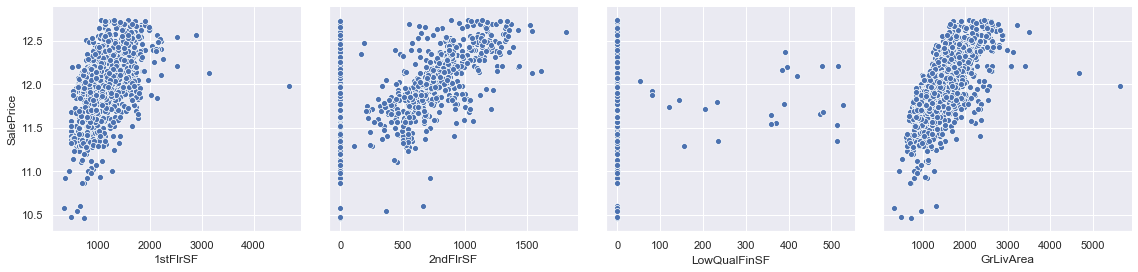

In [37]:
sns.pairplot(df2, x_vars=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

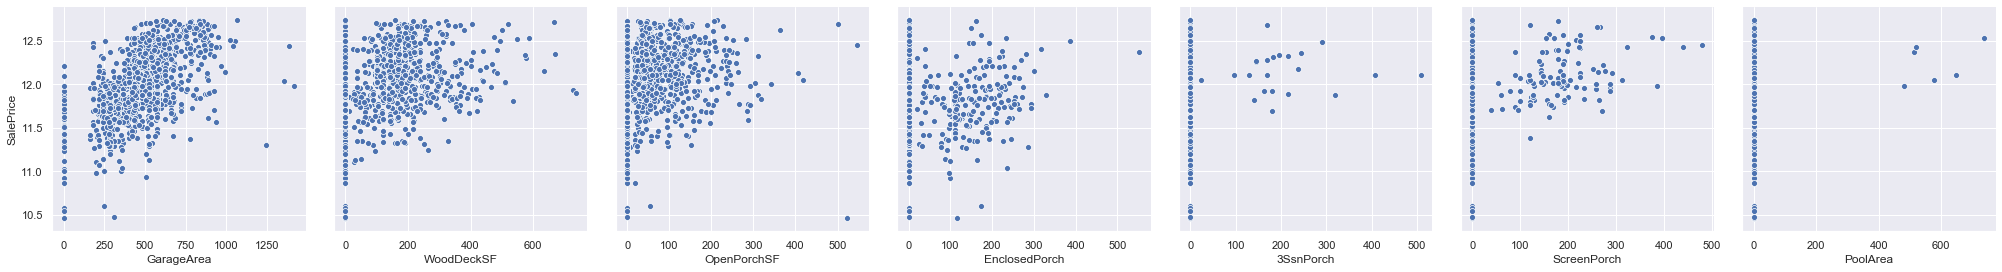

In [38]:
sns.pairplot(df2, x_vars=['GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

<font color=magenta>
From the scatter plots it can be seen that the 'SalePrice' has a positive corrleation with the variables related to area.
Higher the area, higher the Sale Price.

### Deriving new metric from existing variables based on data understanding
Data dictionary shows many features related to Quality and Condition.
Such features are labelled in strings which needs to be converted into numeric form.
Also, based on these quality and condition parameters, scores can be computed for the total area (since variables related area are positively correlated to 'SalePrice'.

In [39]:
# Quality and Condition variables related to the material on the exterior 
#ExterQual and ExterCond

df2['ExterQual'] = df2['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 })
df2['ExterCond'] = df2['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 })
df2['ExterMaterialScore'] = df2['ExterQual'] * df2['ExterCond']

In [40]:
# Quality and Condition variables related to the basement
#BsmtQual and BsmtCond
df2['BsmtQual'] = df2['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df2['BsmtCond'] = df2['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df2['BsmtScore'] = df2['BsmtQual'] * df2['BsmtCond'] * df2['TotalBsmtSF']

In [41]:
# Quality and Condition variables related to the garage
#GarageQual and GarageCond
df2['GarageQual'] = df2['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df2['GarageCond'] = df2['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0 })
df2['GarageScore'] = df2['GarageQual'] * df2['GarageCond'] * df2['GarageArea']

In [42]:
# Overall Quality and Condition
#OverallQual, OverallCond and GrLivArea
df2['OverallScore'] = df2['OverallQual'] * df2['OverallCond'] * df2['GrLivArea']

In [43]:
# Combining total no. of bathromms into a single feature
df2['TotalBath'] = df2['BsmtFullBath'] + df2['BsmtHalfBath'] + df2['FullBath'] + df2['HalfBath']

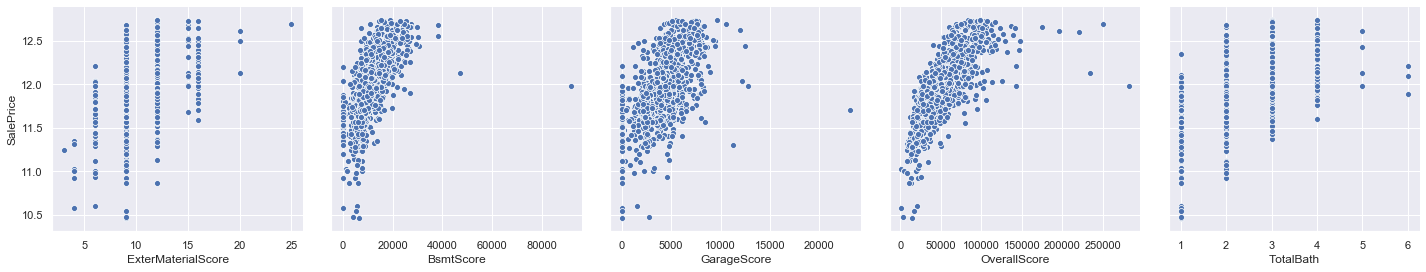

In [44]:
sns.pairplot(df2, x_vars=['ExterMaterialScore','BsmtScore', 'GarageScore', 'OverallScore', 'TotalBath'], y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

<font color=magenta>
<b> Derived Metrics obtained from EDA:</b>
    <br>
    <br>
1. Age = YrSold - YearBuilt
    <br>
2. RemodelAge = YrSold - YearRemodAdd
     <br>
3. ExterMaterialScore = ExterQual * ExterCond
      <br>
4. BsmtScore = BsmtQual * BsmtCond * TotalBsmtSF
      <br>
5. GarageScore = GarageQual * GarageCond *GarageArea
      <br>
6. OverallScore = OverallQual * OverallCond * GrLivArea
      <br>
7. TotalBath = BsmtFullBath + BsmtHalfBath + FullBath + HalfBath
    
These metrics could provide help in dropping the individual features without losing their information.

<b> Removing the individual features that are used to cretae interaction features </b>

In [45]:
#Removing the individual features that are used to cretae combined metric
df2.drop(['ExterQual', 'ExterCond',
          'BsmtQual', 'BsmtCond', 'TotalBsmtSF',
          'GarageQual', 'GarageCond', 'GarageArea',
          'OverallQual', 'OverallCond','GrLivArea', 
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
          'YrSold', 'YearBuilt', 'YearRemodAdd'],axis=1,inplace=True)

In [46]:
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,RemodelAge,ExterMaterialScore,BsmtScore,GarageScore,OverallScore,TotalBath
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247699,5,5,12,10272,4932,59850,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109016,31,31,9,15144,4140,60576,3
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317171,7,6,12,11040,5472,62510,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849405,91,36,9,9072,5778,60095,2
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,0,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429220,8,8,12,13740,7524,87920,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,No,Unf,0,Unf,0,953,GasA,Ex,Y,SBrkr,953,694,0,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,Y,0,40,0,0,0,0,0,8,WD,Normal,12.072547,8,7,9,11436,4140,49410,3
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,119.0,CBlock,No,ALQ,790,Rec,163,589,GasA,TA,Y,SBrkr,2073,0,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,Y,349,0,0,0,0,0,0,2,WD,Normal,12.254868,32,22,9,18504,4500,74628,3
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,Stone,No,GLQ,275,Unf,0,877,GasA,Ex,Y,SBrkr,1188,1152,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,Y,0,60,0,0,0,0,2500,5,WD,Normal,12.493133,69,4,20,13824,2268,147420,2
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Mn,GLQ,49,Rec,1029,0,GasA,Gd,Y,FuseA,1078,0,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,Y,366,0,112,0,0,0,0,4,WD,Normal,11.864469,60,14,9,9702,2160,32340,2


In [47]:
#Identifying the number of columns with numerical variable
num_variables=df2.select_dtypes(include='number')
print('No. of columns with numerical variable =',num_variables.shape[1])

No. of columns with numerical variable = 32


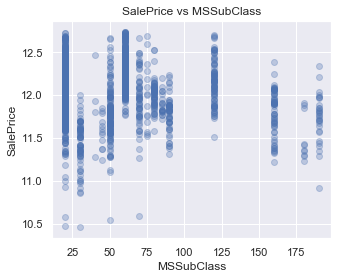

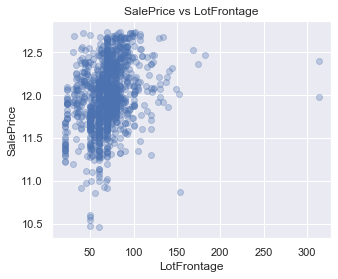

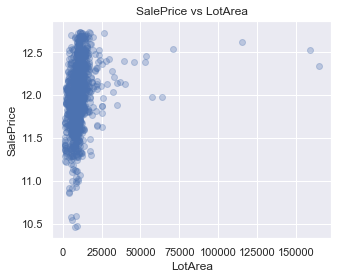

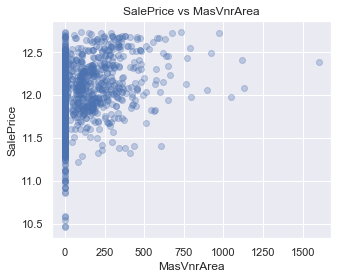

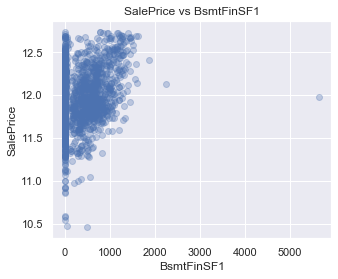

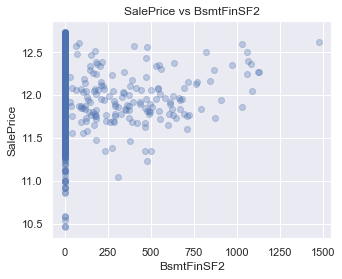

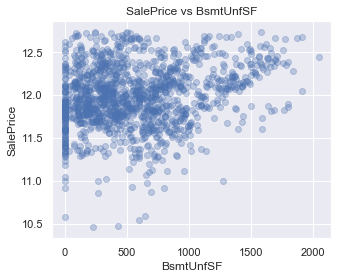

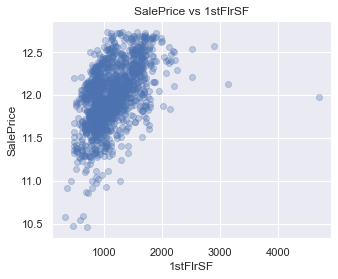

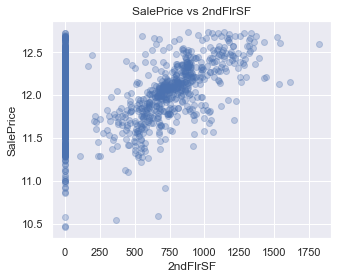

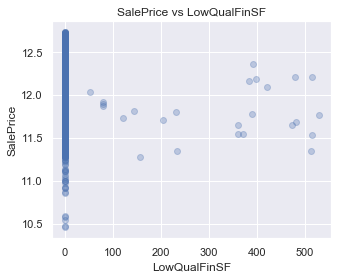

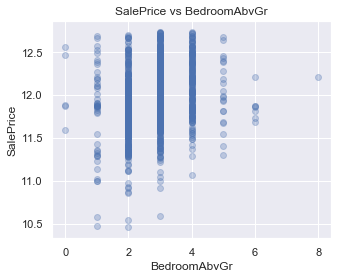

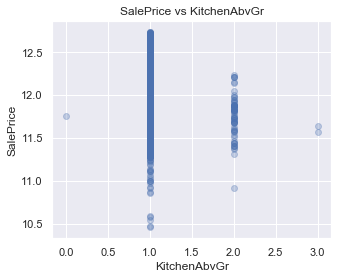

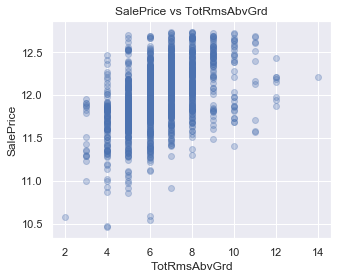

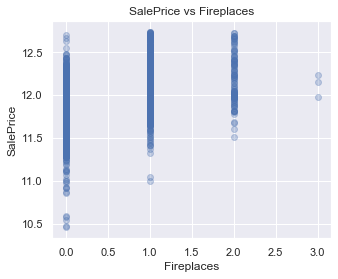

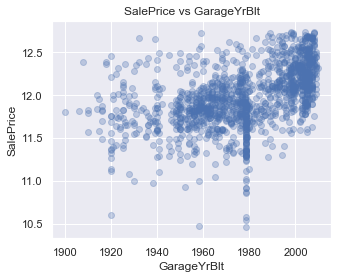

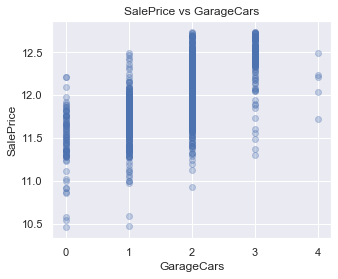

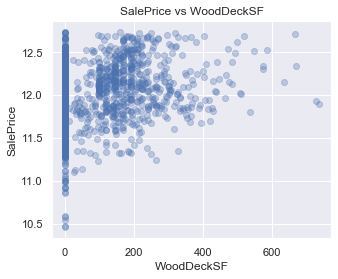

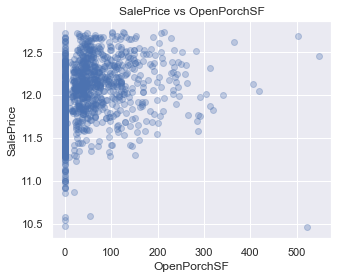

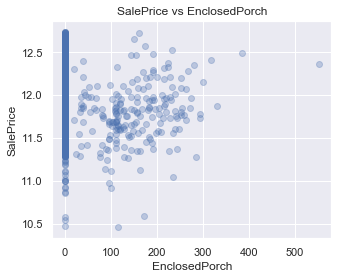

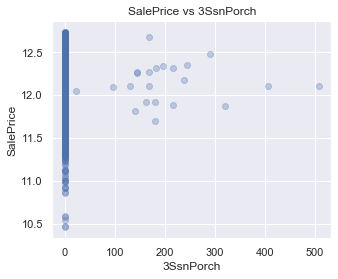

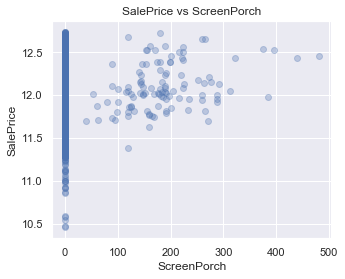

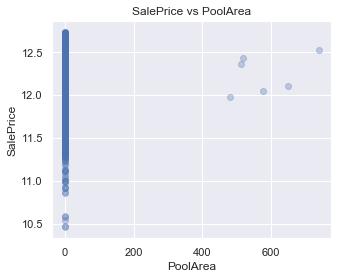

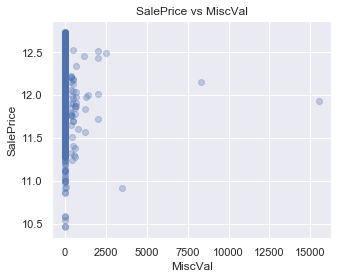

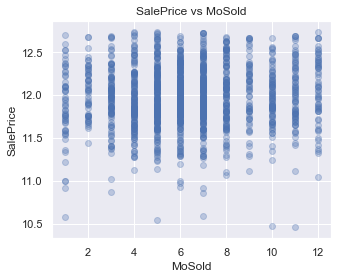

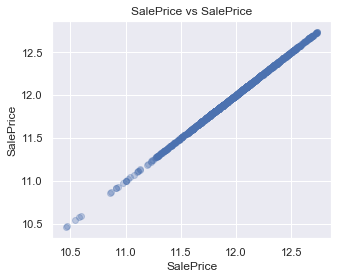

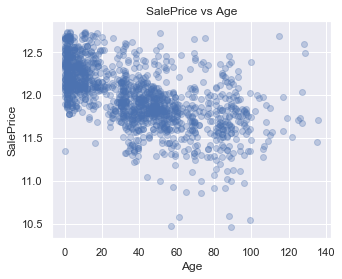

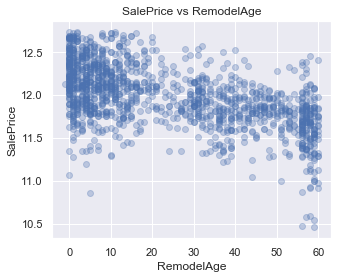

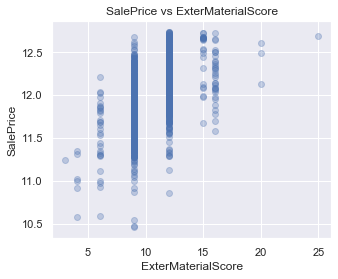

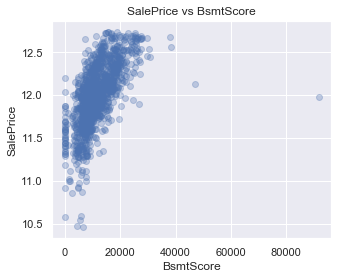

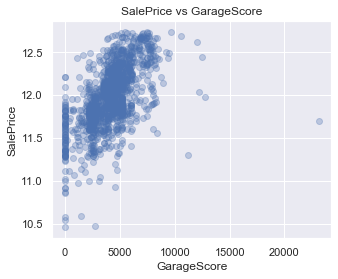

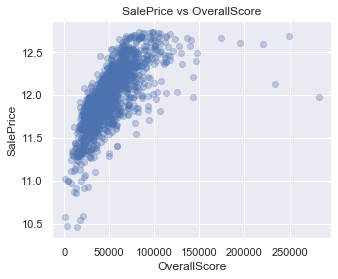

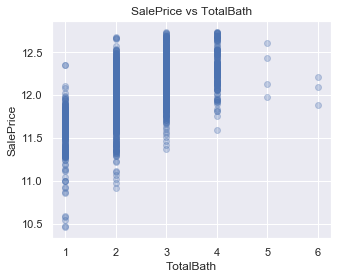

In [48]:
for features in num_variables.columns.values:
    plt.figure(figsize=(5,4))
    plt.scatter(num_variables[features],num_variables['SalePrice'], alpha = 0.3)
    plt.title("SalePrice vs "+str(features))
    plt.xlabel(str(features))
    plt.ylabel('SalePrice')
plt.show()

<b> Correlation Analysis on Numerical variables </b>

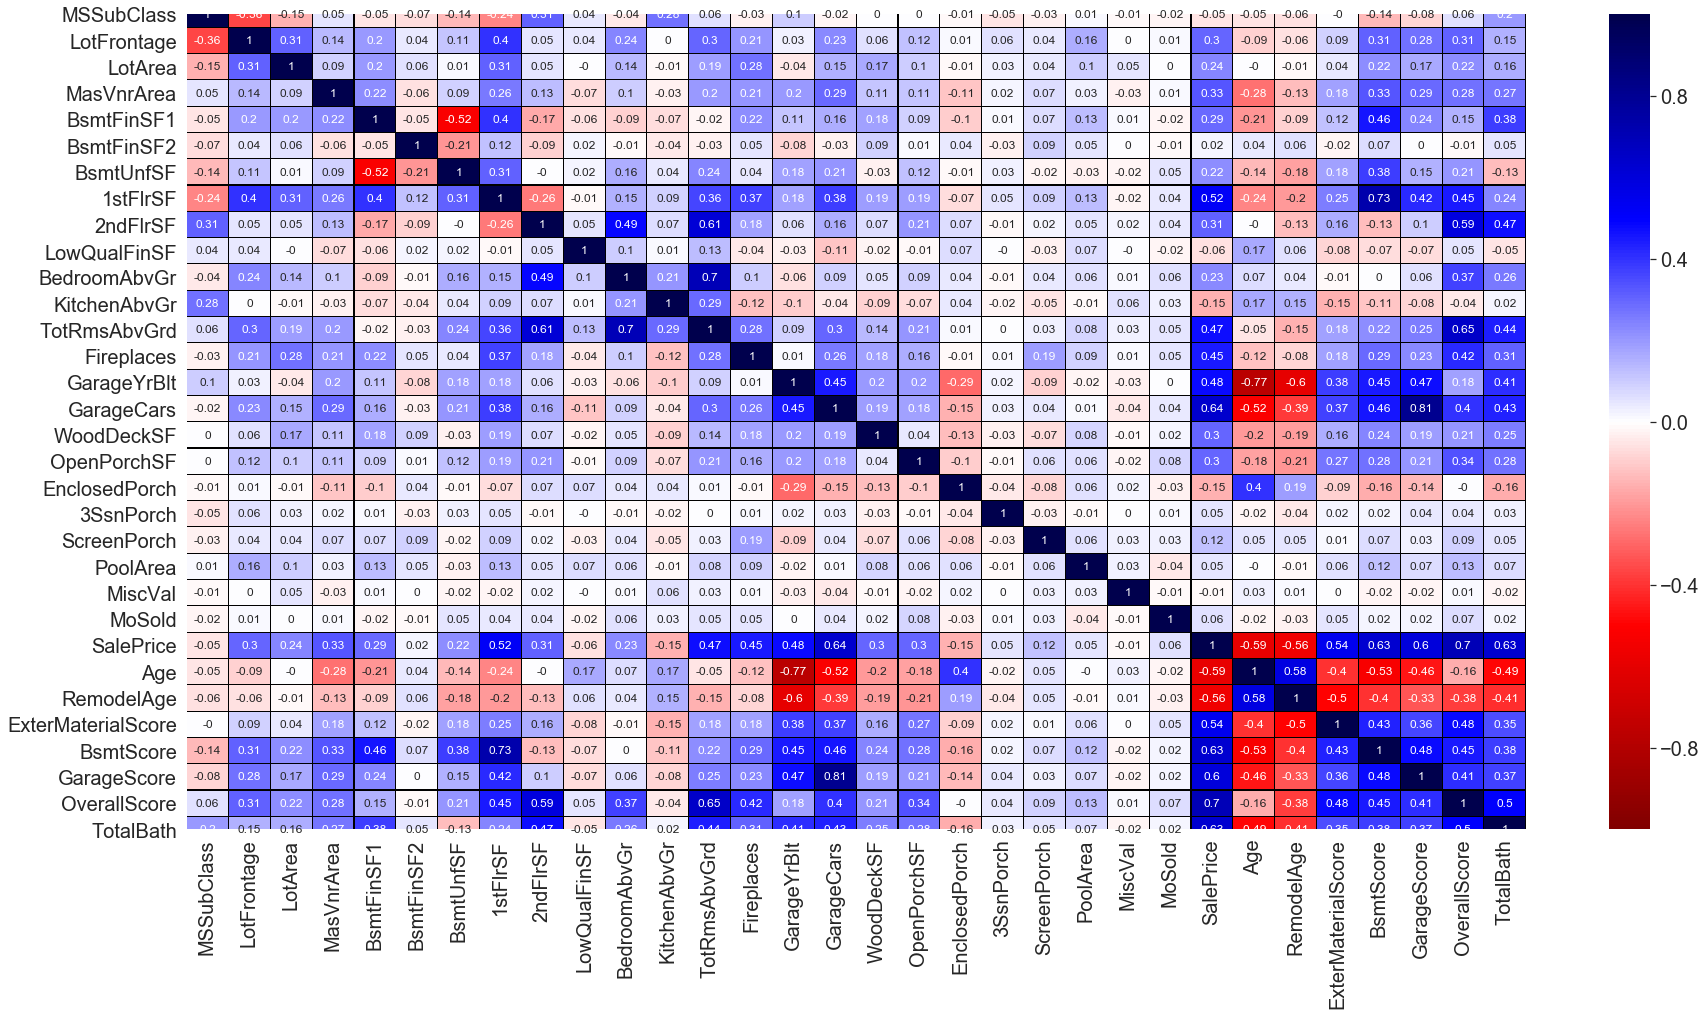

In [49]:
fig = plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
PCM = sns.heatmap(num_variables.corr().round(2), vmin=-1, vmax=1, center=0, annot = True, cmap="seismic_r", linewidths=0.1, linecolor='black')
plt.show()


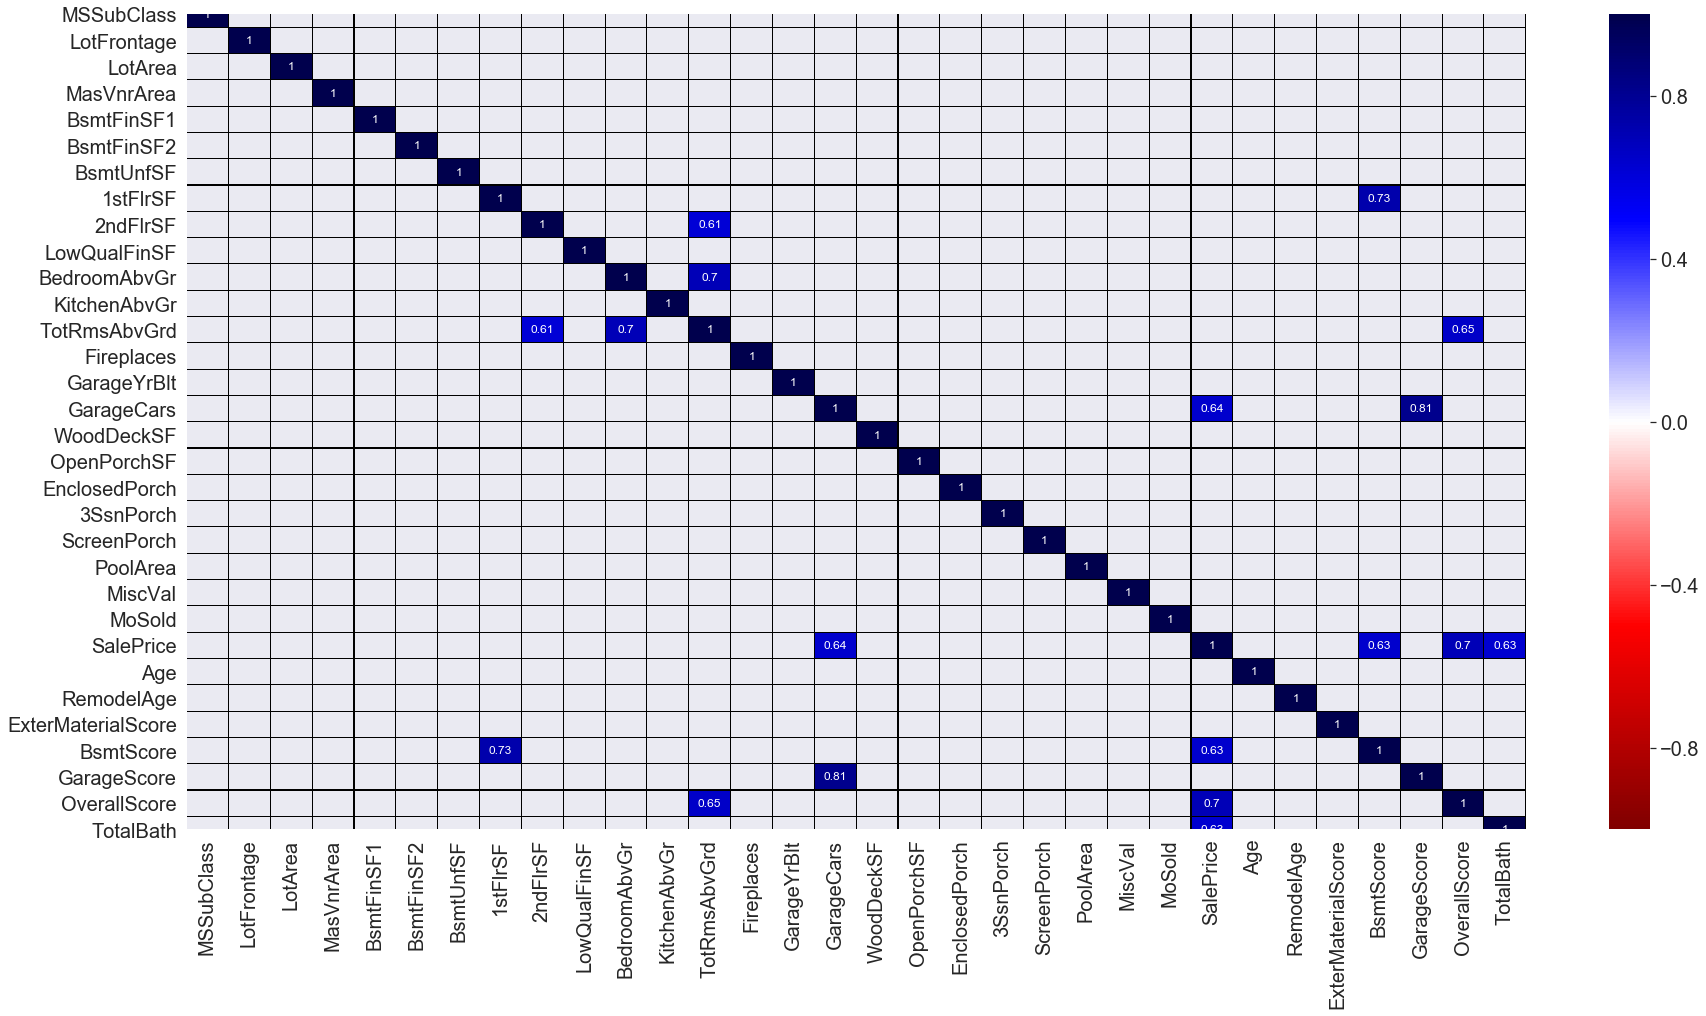

In [50]:
# filter correlation pairs greater than 0.6
correlation = num_variables.corr()
filter1 = correlation[correlation>=0.6] 
plt.figure(figsize=(30,15))
sns.heatmap(filter1, vmin=-1, vmax=1, center=0, annot = True, cmap="seismic_r", linewidths=0.1, linecolor='black')

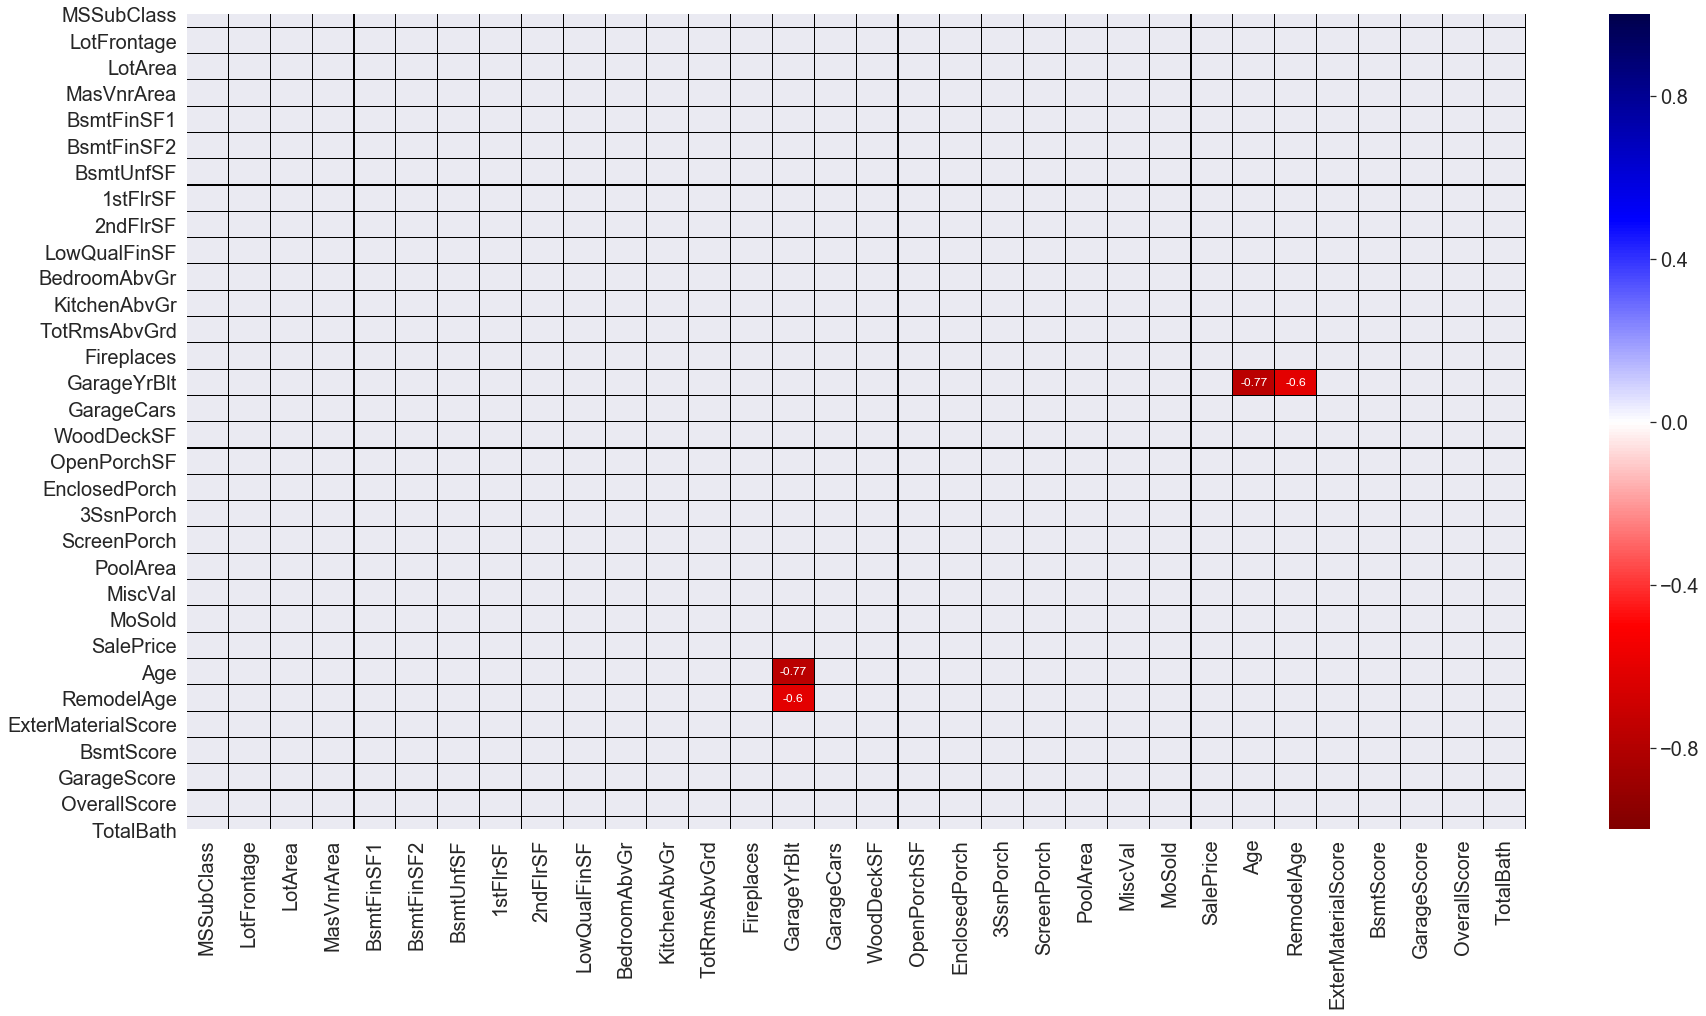

In [51]:
# filter correlation pairs lesser than -0.6
correlation = num_variables.corr()
filter2 = correlation[correlation<=-0.6] 
plt.figure(figsize=(30,15))
sns.heatmap(filter2, vmin=-1, vmax=1, center=0, annot = True, cmap="seismic_r", linewidths=0.1, linecolor='black')

<font color=magenta>
From Correlation Matrix, it can be seen that the derived mertics are strongly corrleated with 'SalePrice'.
<br>
- |Correlation Coefficient, r| > 0.5
<br>
- Multicollinearity exists between the following predictors:
  <br>
'GarageCars' & 'GarageScore' ( r = 0.81, dropping  'GarageCars', since 'GarageScore'  captures more information from other columns as well)
    <br>
'TotRmsAbvGrd' & 'BedroomAbvGr', '2ndFlrSF', 'OverallScore' ( dropping  'TotRmsAbvGrd')
    <br>
'1stFlrSF' & 'BsmtScore' (dropping  '1stFlrSF')
    <br>
'GarageYrBlt' & 'Age', 'RemodelAge' (dropping 'GarageYrBlt')
    

In [52]:
#removing the features to avoid multicollinearity in building the model 
df2.drop(columns=['GarageCars','TotRmsAbvGrd','1stFlrSF','GarageYrBlt'],inplace=True)
num_variables.drop(columns=['GarageCars','TotRmsAbvGrd','1stFlrSF','GarageYrBlt'],inplace=True)

### Exploring the Categorical Variables

In [53]:
#Identifying the number of columns with categorical variable
cat_variables=df2.select_dtypes(include='object')
print('No. of columns with categorical variable =',cat_variables.shape[1])

No. of columns with categorical variable = 33


In [54]:
#chceking the value counts present in each categorical variable 
for i in cat_variables:
    print(i,':\n',cat_variables[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

MSZoning:
RL         1093
RM          216
FV           64
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------

Street:
Pave    1393
Grvl       6
Name: Street, dtype: int64
--------------------------

LotShape:
Reg    898
IR1    457
IR2     35
IR3      9
Name: LotShape, dtype: int64
--------------------------

LandContour:
Lvl    1261
Bnk      63
HLS      41
Low      34
Name: LandContour, dtype: int64
--------------------------

Utilities:
AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------

LotConfig:
Inside     1008
Corner      255
CulDSac      86
FR2          46
FR3           4
Name: LotConfig, dtype: int64
--------------------------

LandSlope:
Gtl    1326
Mod      61
Sev      12
Name: LandSlope, dtype: int64
--------------------------

Neighborhood:
NAmes      224
CollgCr    148
OldTown    112
Edwards    100
Somerst     84
Gilbert     78
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
NridgHt     50


In [55]:
#Certain columns have largely of single value and hence dropping these columns
df2.drop(columns=['Street','Utilities','LandSlope','Condition2',
                          'BsmtFinType2','Heating','CentralAir','Electrical',
                          'Functional','PavedDrive'],inplace=True)
cat_variables.drop(columns=['Street','Utilities','LandSlope','Condition2',
                          'BsmtFinType2','Heating','CentralAir','Electrical',
                          'Functional','PavedDrive'],inplace=True)

In [56]:
# Creating Dummy Variables for Categorical Variables
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,RemodelAge,ExterMaterialScore,BsmtScore,GarageScore,OverallScore,TotalBath,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,706,0,150,854,0,3,1,0,0,61,0,0,0,0,0,2,12.247699,5,5,12,10272,4932,59850,4,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0.0,978,0,284,0,0,3,1,1,298,0,0,0,0,0,0,5,12.109016,31,31,9,15144,4140,60576,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,162.0,486,0,434,866,0,3,1,1,0,42,0,0,0,0,0,9,12.317171,7,6,12,11040,5472,62510,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0.0,216,0,540,756,0,3,1,1,0,35,272,0,0,0,0,2,11.849405,91,36,9,9072,5778,60095,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,350.0,655,0,490,1053,0,4,1,1,192,84,0,0,0,0,0,12,12.429220,8,8,12,13740,7524,87920,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [57]:
df2.shape

(1399, 173)

### Splitting data into train & test sets

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X= df2.drop('SalePrice',axis=1)
y= df2['SalePrice']

In [60]:
X.shape

(1399, 172)

In [61]:
X.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,RemodelAge,ExterMaterialScore,BsmtScore,GarageScore,OverallScore,TotalBath,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,706,0,150,854,0,3,1,0,0,61,0,0,0,0,0,2,5,5,12,10272,4932,59850,4,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0.0,978,0,284,0,0,3,1,1,298,0,0,0,0,0,0,5,31,31,9,15144,4140,60576,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,162.0,486,0,434,866,0,3,1,1,0,42,0,0,0,0,0,9,7,6,12,11040,5472,62510,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0.0,216,0,540,756,0,3,1,1,0,35,272,0,0,0,0,2,91,36,9,9072,5778,60095,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,350.0,655,0,490,1053,0,4,1,1,192,84,0,0,0,0,0,12,8,8,12,13740,7524,87920,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [62]:
y.shape

(1399,)

In [63]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [64]:
#Train-Test split using sklearn
np.random.seed(0)
X_train, X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
#cheking shape of train test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(979, 172)
(420, 172)
(979,)
(420,)


### Data Scaing 

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols=list(num_variables.columns.values)
cols.remove('SalePrice')

X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,RemodelAge,ExterMaterialScore,BsmtScore,GarageScore,OverallScore,TotalBath,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
162,-0.873371,1.261770,0.385769,0.900574,1.857462,-0.294909,-0.512800,-0.790654,-0.12683,0.213439,-0.222246,0.669439,-0.730281,0.440417,-0.372897,-0.108578,-0.251663,-0.05541,-0.150112,-0.468372,-1.101681,-0.912641,0.824065,1.180240,0.379072,0.138056,-0.388265,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
743,0.503489,0.066455,0.499361,-0.554697,0.093591,-0.294909,-1.130587,-0.790654,-0.12683,0.213439,-0.222246,0.669439,1.732742,-0.679500,-0.372897,-0.108578,1.583689,-0.05541,-0.150112,1.401678,0.245885,-0.672149,-0.640109,-0.769448,0.138297,-0.238316,0.723171,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1271,-0.873371,0.068843,-0.102479,-0.554697,-0.940965,-0.294909,2.175976,-0.790654,-0.12683,0.213439,-0.222246,0.669439,-0.730281,-0.679500,-0.372897,-0.108578,-0.251663,-0.05541,-0.150112,0.653658,0.081548,0.818901,-0.640109,0.370098,0.054952,0.461364,-0.388265,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

In [67]:
y_train.head()

162     12.301387
743     12.072547
1271    12.132162
1110    12.144203
344     11.350418
Name: SalePrice, dtype: float64

In [68]:
X_test[cols] = scaler.fit_transform(X_test[cols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,RemodelAge,ExterMaterialScore,BsmtScore,GarageScore,OverallScore,TotalBath,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,...,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
138,0.094110,0.100529,-0.163731,1.318189,0.516457,-0.28521,-0.517109,1.126623,-0.10491,0.077732,-0.203279,2.213296,1.120822,0.767421,-0.343754,-0.126206,-0.303801,-0.084384,-0.0911,2.007293,-0.926044,-0.752166,0.809180,0.104528,0.813592,0.916062,0.620531,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
212,0.094110,0.056662,-0.199720,-0.597471,0.879296,-0.28521,-1.112119,1.291771,-0.10491,0.077732,-0.203279,0.637729,0.653100,0.795092,-0.343754,-0.126206,-0.303801,-0.084384,-0.0911,0.198145,-1.235626,-1.146375,-0.728628,-0.134213,0.744432,0.534322,1.748768,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1187,-0.884871,0.802403,0.123080,-0.597471,2.373063,-0.28521,-0.904558,-0.818456,-0.10491,-1.131428,-0.203279,0.637729,-0.750065,0.878107,2.889694,-0.126206,-0.303801,-0.084384,-0.0911,0.198145,-0.822850,-0.604337,0.809180,1.527793,1.232874,0.540094,0.620531,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1006,

# <font color=green> 4. Model Building </font>

#### Linear Regression with Recursive Feature Elimination for selecting 40 features


In [69]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 40)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False  True False  True  True  True  True False False False False False
 False False False False False False False False  True False  True  True
 False False  True False False False False  True  True False False False
 False False  True False False False False False  True  True False False
 False False  True  True  True False False False  True False False False
 False False False False False  True False False  True  True  True  True
 False  True  True False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False False False False False  True False False
 False  True  True  True False False False False False  True False False
 False False False  True  True  True False False Fa

In [70]:
col=X_train.columns[rfe.support_]
col

Index(['Age', 'BsmtScore', 'OverallScore', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_PosN', 'Condition1_RRAe', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'RoofMatl_CompShg', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'Exterior2nd_Stucco',
       'Foundation_Stone', 'HeatingQC_Fa', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Basment', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_Oth', 'SaleCondition_Normal'],
      dtype='object')

In [71]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train[list(col)])

In [72]:
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        17:50:33   Log-Likelihood:                 545.22
No. Observations:                 979   AIC:                            -1008.
Df Residuals:                     938   BIC:                            -808.1
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.0214 

## Ridge Regression - L2

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross Validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.108896,-0.071387
1,0.001,{'alpha': 0.001},-0.108790,-0.071422
2,0.01,{'alpha': 0.01},-0.107958,-0.071824
3,0.05,{'alpha': 0.05},-0.106714,-0.073571
4,0.1,{'alpha': 0.1},-0.106232,-0.074876
5,0.2,{'alpha': 0.2},-0.105449,-0.076260
6,0.3,{'alpha': 0.3},-0.104944,-0.077010
7,0.4,{'alpha': 0.4},-0.104492,-0.077499
8,0.5,{'alpha': 0.5},-0.104123,-0.077857
9,0.6,{'alpha': 0.6},-0.103830,-0.078142


In [75]:
model_cv.best_params_

{'alpha': 20}

In [76]:
model_cv.best_score_

-0.09883345883058492

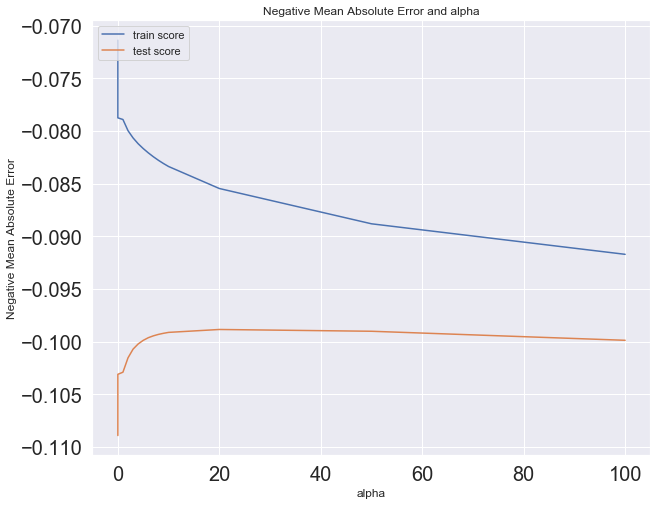

In [77]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
from sklearn.metrics import r2_score

alpha = 20.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train=ridge.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_ridge_train),2))
y_pred_ridge_test=ridge.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_ridge_test),2))

Train R2 Square :  0.87
Test R2 Square :  0.83


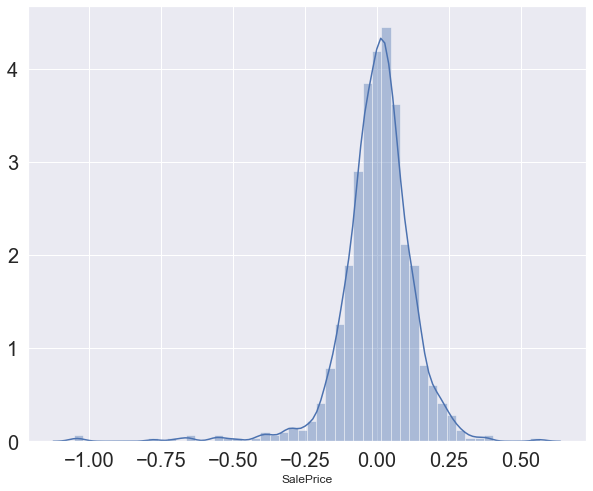

In [79]:
sns.distplot((y_train-y_pred_ridge_train))

In [80]:
#Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
var_coef

[('constant', 11.87),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.01),
 ('LotArea', 0.01),
 ('MasVnrArea', -0.01),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinSF2', 0.01),
 ('BsmtUnfSF', 0.03),
 ('2ndFlrSF', 0.02),
 ('LowQualFinSF', 0.01),
 ('BedroomAbvGr', 0.03),
 ('Fireplaces', 0.03),
 ('WoodDeckSF', 0.01),
 ('EnclosedPorch', 0.02),
 ('ScreenPorch', 0.02),
 ('PoolArea', -0.03),
 ('Age', -0.06),
 ('RemodelAge', -0.03),
 ('ExterMaterialScore', 0.01),
 ('BsmtScore', 0.01),
 ('GarageScore', 0.04),
 ('OverallScore', 0.1),
 ('TotalBath', 0.04),
 ('MSZoning_FV', 0.04),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', -0.01),
 ('LotShape_IR3', -0.04),
 ('LotShape_Reg', 0.01),
 ('LandContour_HLS', 0.04),
 ('LandContour_Low', -0.01),
 ('LandContour_Lvl', 0.04),
 ('LotConfig_CulDSac', 0.01),
 ('LotConfig_FR2', -0.01),
 ('LotConfig_Inside', -0.02),
 ('Neighborhood_BrDale', -0.01),
 ('Neighborhood_ClearCr', 0.04),
 ('Neighborhood_CollgCr', -0.01),
 ('Neighborhood_Crawfor', 0.08),
 ('Neighborhood_Edwards', -0.08),
 

In [81]:
df3 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
ridge_params = pd.DataFrame(data = df3)


In [82]:
print(ridge_params.reindex(ridge_params.Coeff.abs().sort_values(ascending = False).index))

                   Feature  Coeff
0                 constant  11.87
21            OverallScore   0.10
37    Neighborhood_Crawfor   0.08
38    Neighborhood_Edwards  -0.08
40     Neighborhood_IDOTRR  -0.07
24             MSZoning_RL   0.06
41    Neighborhood_MeadowV  -0.06
45    Neighborhood_NridgHt   0.06
16                     Age  -0.06
124   SaleCondition_Normal   0.06
106         KitchenQual_Fa  -0.06
74     Exterior1st_BrkFace   0.06
93        Foundation_PConc   0.05
50    Neighborhood_Somerst   0.05
23             MSZoning_FV   0.04
20             GarageScore   0.04
28         LandContour_HLS   0.04
26            LotShape_IR3  -0.04
102           HeatingQC_Fa  -0.04
30         LandContour_Lvl   0.04
51    Neighborhood_StoneBr   0.04
35    Neighborhood_ClearCr   0.04
101       BsmtFinType1_Unf  -0.04
22               TotalBath   0.04
108         KitchenQual_TA  -0.04
11              Fireplaces   0.03
7                BsmtUnfSF   0.03
44    Neighborhood_NoRidge   0.03
115       Gara

## Lasso Regularization - L1

In [83]:
from sklearn.linear_model import Lasso

lasso = Lasso()
# Cross Validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.102908,-0.074931
1,0.001,{'alpha': 0.001},-0.098415,-0.086832
2,0.01,{'alpha': 0.01},-0.105995,-0.102505
3,0.05,{'alpha': 0.05},-0.128419,-0.126019
4,0.1,{'alpha': 0.1},-0.165822,-0.164152
5,0.2,{'alpha': 0.2},-0.255274,-0.254307
6,0.3,{'alpha': 0.3},-0.278223,-0.278124
7,0.4,{'alpha': 0.4},-0.278223,-0.278124
8,0.5,{'alpha': 0.5},-0.278223,-0.278124
9,0.6,{'alpha': 0.6},-0.278223,-0.278124


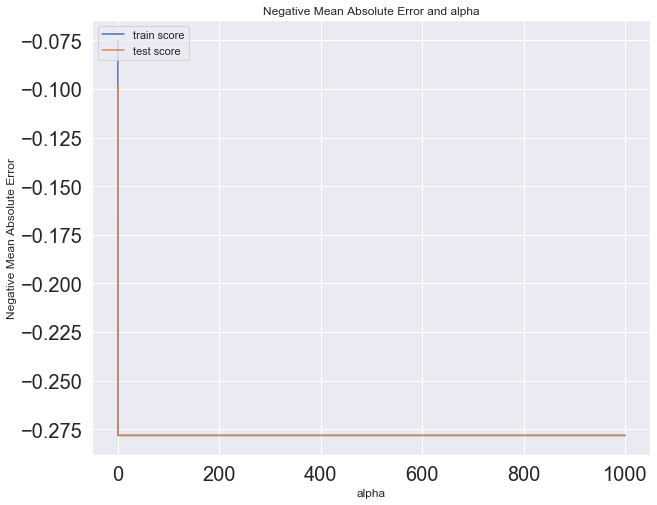

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
model_cv.best_params_

{'alpha': 0.001}

In [87]:
model_cv.best_score_

-0.09841512087946117

In [88]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))
#lasso.coef_

Train R2 Square :  0.86
Test R2 Square :  0.83


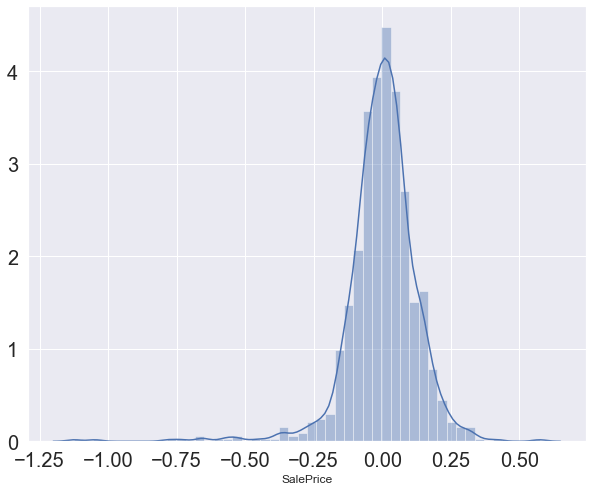

In [89]:
sns.distplot((y_train-y_pred_lasso_train))

In [90]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 11.857),
 ('MSSubClass', -0.016),
 ('LotFrontage', -0.011),
 ('LotArea', 0.015),
 ('MasVnrArea', -0.006),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinSF2', 0.008),
 ('BsmtUnfSF', 0.025),
 ('2ndFlrSF', 0.001),
 ('LowQualFinSF', 0.006),
 ('BedroomAbvGr', 0.026),
 ('Fireplaces', 0.032),
 ('WoodDeckSF', 0.011),
 ('EnclosedPorch', 0.016),
 ('3SsnPorch', 0.002),
 ('ScreenPorch', 0.023),
 ('PoolArea', -0.035),
 ('MoSold', 0.002),
 ('Age', -0.06),
 ('RemodelAge', -0.027),
 ('ExterMaterialScore', 0.004),
 ('BsmtScore', 0.013),
 ('GarageScore', 0.045),
 ('OverallScore', 0.109),
 ('TotalBath', 0.045),
 ('MSZoning_FV', 0.005),
 ('MSZoning_RL', 0.063),
 ('LotShape_IR3', -0.005),
 ('LandContour_HLS', 0.049),
 ('LandContour_Lvl', 0.041),
 ('LotConfig_Inside', -0.017),
 ('Neighborhood_ClearCr', 0.024),
 ('Neighborhood_Crawfor', 0.11),
 ('Neighborhood_Edwards', -0.083),
 ('Neighborhood_IDOTRR', -0.063),
 ('Neighborhood_MeadowV', -0.078),
 ('Neighborhood_NoRidge', 0.004),
 ('Neighborhood_NridgHt', 0

In [91]:
df4 = {'Feature':list(list(zip(*var_coef))[0]),'Coeff':list(list(zip(*var_coef))[1])}
lasso_params = pd.DataFrame(data = df4)

In [92]:
lasso_params.reindex(lasso_params.Coeff.abs().sort_values(ascending = False).index)

,Feature,Coeff
0,constant,11.87
21,OverallScore,0.10
37,Neighborhood_Crawfor,0.08
38,Neighborhood_Edwards,-0.08
40,Neighborhood_IDOTRR,-0.07
24,MSZoning_RL,0.06
41,Neighborhood_MeadowV,-0.06
45,Neighborhood_NridgHt,0.06
16,Age,-0.06
124,SaleCondition_Normal,0.06


In [93]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.86
r2_score in test dataset:
r2_score for ridge: 0.83
r2_score for lasso: 0.83


<font color=navy>
<b>Insights:<b>
<br>
Regression model has built using ridge and lasso regularization
<br>

The variables that are significant in predicting the price of a house are:
<br>
(predicted by multiple linear regression with lasso regularization)
<br>
<br>
1. OverallScore (OverallScore is a derived metric and it is defined as OverallScore = OverallQual * OverallCond * GrLivArea)
<br>
2. Neighborhood_Crawfor
<br>
3. Neighborhood_Edwards
<br>
4. Neighborhood_IDOTRR
<br>
5. MSZoning_RL
<br>
6. Neighborhood_MeadowV
<br>
7. Neighborhood_NridgHt
<br>
8. Age (Age is a derived metric and it is defined as Age = YrSold - YearBuilt)
<br>
9. SaleCondition_Normal
<br>
10. KitchenQual_Fa

<br>
It is clear that overall condition, material and finish; the construction age and the physical locations within Ames city limits are the most significant factors.



<font color ='red'>
*******************************************************************************************************************************************************************************
    <br>
*******************************************************************************************************************************************************************************

## For Subjective Questions:

Question1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [94]:
alpha = 40
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train=ridge.predict(X_train)
print("Train R2 Square:", round(r2_score(y_train,y_pred_ridge_train),2))
y_pred_ridge_test=ridge.predict(X_test)
print("Test R2 Square:", round(r2_score(y_test,y_pred_ridge_test),2))

Train R2 Square: 0.86
Test R2 Square: 0.83


In [95]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))

Train R2 Square :  0.84
Test R2 Square :  0.82


In [96]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df3 = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df3['B-Coeff']=df3['B-Coeff'].abs()
df3=df3.sort_values(by=['B-Coeff'],ascending=False)



In [97]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Lasso after Doubling the Alpha :',df[1:6].values)

Top 5 Predictor Variables using Lasso after Doubling the Alpha : [['OverallScore' 0.112]
 ['Neighborhood_Crawfor' 0.071]
 ['Neighborhood_Edwards' 0.069]
 ['Neighborhood_Somerst' 0.068]
 ['MSZoning_RL' 0.061]]


Question 3: 
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [98]:
X_train=X_train.drop(['OverallScore','Neighborhood_Crawfor' , 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'MSZoning_RL'],axis=1)
X_test=X_test.drop(['OverallScore','Neighborhood_Crawfor' , 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'MSZoning_RL'],axis=1)

In [99]:
lasso = Lasso()
# Cross Validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','params','mean_test_score','mean_train_score']]

,param_alpha,params,mean_test_score,mean_train_score
0,0.0001,{'alpha': 0.0001},-0.117245,-0.088267
1,0.001,{'alpha': 0.001},-0.112386,-0.098840
2,0.01,{'alpha': 0.01},-0.120426,-0.114576
3,0.05,{'alpha': 0.05},-0.144660,-0.141869
4,0.1,{'alpha': 0.1},-0.182198,-0.179605
5,0.2,{'alpha': 0.2},-0.260348,-0.259342
6,0.3,{'alpha': 0.3},-0.278223,-0.278124
7,0.4,{'alpha': 0.4},-0.278223,-0.278124
8,0.5,{'alpha': 0.5},-0.278223,-0.278124
9,0.6,{'alpha': 0.6},-0.278223,-0.278124


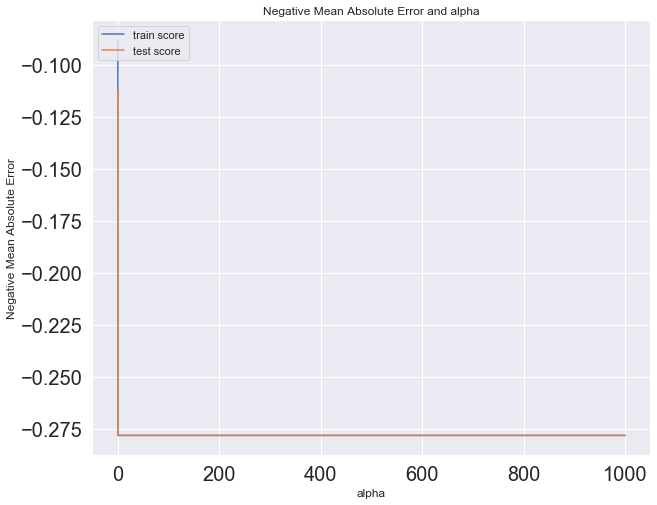

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [102]:
model_cv.best_params_

{'alpha': 0.001}

In [103]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ',round(r2_score(y_train,y_pred_lasso_train),2))
y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ',round(r2_score(y_test,y_pred_lasso_test),2))

Train R2 Square :  0.87
Test R2 Square :  0.74


In [104]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)

In [105]:
print('Top 5 Predictor Variables using Lasso after Droping 5 Important Predictor Variables :',df[1:6].values)

Top 5 Predictor Variables using Lasso after Droping 5 Important Predictor Variables : [['RoofMatl_CompShg' 1.033]
 ['RoofStyle_Shed' 0.964]
 ['RoofStyle_Gable' 0.944]
 ['RoofStyle_Mansard' 0.933]
 ['RoofMatl_Membran' 0.923]]
